# Importe

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from uncertainties import ufloat
import scipy as sp
from scipy.optimize import curve_fit
import statsmodels.api as sm
plt.rc('text',usetex=True)

# Daten laden

In [3]:
data=pd.read_csv('erster_teilversuch.txt',sep='\t')
#print(f'Daten: \n {data} \n\n')

Time=data['Time'].values
print(f'Zeit:\n {Time}\n\n')

M1=data['M1'].values
print(f'Messreihe 1:\n {M1}\n\n')

M2=data['M2'].values
print(f'Messreihe 2:\n {M2}\n\n')

vp_t=Time[:6]
print(f'Vorperiode Zeit: \n{vp_t}\n\n')

hp_t=Time[5:36]
print(f'Hauptperiode Zeit: \n{hp_t}\n\n')

np_t=Time[36:42]
print(f'Nachperiode Zeit: \n{np_t}\n\n')

vp_T_1=M1[:6]
print(f'Vorperiode Temperatur Messreihe 1: \n{vp_T_1}\n\n')

hp_T_1=M1[5:36]
print(f'Hauptperiode Temperatur Messreihe 1: \n{hp_T_1}\n\n')

np_T_1=M1[36:42]
print(f'Nachperiode Temperatur Messreihe 1: \n{np_T_1}\n\n')

vp_T_2=M2[:6]
print(f'Vorperiode Temperatur Messreihe 2: \n{vp_T_2}\n\n')

hp_T_2=M2[5:36]
print(f'Hauptperiode Temperatur Messreihe 2: \n{hp_T_2}\n\n')

np_T_2=M2[36:42]
print(f'Nachperiode Temperatur Messreihe 2: \n{np_T_2}\n\n')

Zeit:
 [  0  60 120 180 240 300 310 320 330 340 350 360 370 380 390 400 410 420
 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600
 660 720 780 840 900 960]


Messreihe 1:
 [26.9 26.4 26.3 26.4 26.4 26.4 27.2 27.9 28.6 29.2 29.8 30.5 31.2 31.7
 32.3 33.  33.7 34.2 34.9 35.5 36.2 36.6 37.3 38.  38.5 39.2 39.8 40.4
 41.  41.6 42.1 42.8 43.3 44.  44.6 45.2 44.9 44.6 44.4 44.2 44.1 43.9]


Messreihe 2:
 [26.9 27.  27.1 27.1 27.1 27.2 27.8 28.3 29.1 29.7 30.4 31.1 31.7 32.4
 33.  33.6 34.2 34.8 35.4 36.1 36.8 37.4 38.  38.5 39.2 39.8 40.4 41.
 41.6 42.2 42.8 43.5 44.  44.6 45.2 45.8 45.4 45.2 45.  44.8 44.7 44.5]


Vorperiode Zeit: 
[  0  60 120 180 240 300]


Hauptperiode Zeit: 
[300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470
 480 490 500 510 520 530 540 550 560 570 580 590 600]


Nachperiode Zeit: 
[660 720 780 840 900 960]


Vorperiode Temperatur Messreihe 1: 
[26.9 26.4 26.3 26.4 26.4 26.4]


Hauptperiode Temperatur Messreihe 1: 
[26.4 27.2

Dichte von Wasser: 1000kg/m^3  
Quelle: https://www.chemie.de/lexikon/Eigenschaften_des_Wassers.html, ist bereits in Citavi enthalten.

# Definitionen

## Lineare Regression

In [4]:
def f(t,a,b):
    k=a*t+b
    return k

## elektrische Methode
$$ U I \Delta t=(m_w c_w+C_k)\Delta T\\
C_k=\frac{U I \Delta t}{\Delta T}-m_w c_w$$

In [5]:
def elekt_Meth_C_k(delta_t,Spannung,Strom,delta_T,Masse,spez_Wk):
    C=((Spannung*Strom*delta_t)/delta_T)-(Masse*spez_Wk)
    return C

def elekt_Teil(U,I,delta_t,delta_T):
    f=(U*I*delta_t)/delta_T
    return f

def massen_teil(m,sp_Wk):
    f=m*sp_Wk
    return f


## Mischmethode
$$(m_1 c_w+C_k)(T_w-T_1)=m_2 c_w(T_2-T_m)\\
C_k=m_2 c_w\frac{(T_2-T_m)}{(T_w-T_1)}-m_1 c_w$$

In [6]:
def Misch_meth(masse_1,masse_2,sp_Wk,T_1,T_2,T_m):
    C=masse_2*sp_Wk*(T_2-T_m)/(T_m-T_1)-masse_1*sp_Wk
    return C

## Temperaturdifferenz

In [7]:
def Del_T(ts,a_np,b_np,a_vp,b_vp):
    T=f(ts,a_np,b_np)-f(ts,a_vp,b_vp)
    return T

# Fehler
Zeit: $$ 0.01+5\cdot 10^{-4}t$$

In [8]:
Time_err=np.zeros(len(M1))
#print(Time)
for i in range(len(Time)):
    Time_err[i]=np.sqrt((0.01+5e-4*Time[i])**2+1)
print(Time_err)

Temp_err=np.zeros(len(M1))
for i in range(len(Time)):
    Temp_err[i]=0.2

[1.00005    1.00079968 1.00244701 1.00498756 1.0084146  1.01271911
 1.01352109 1.01434708 1.01519703 1.01607086 1.01696853 1.01788997
 1.01883512 1.0198039  1.02079626 1.02181212 1.02285141 1.02391406
 1.025      1.02610916 1.02724145 1.02839681 1.02957516 1.03077641
 1.03200048 1.03324731 1.0345168  1.03580886 1.03712343 1.0384604
 1.0398197  1.04120123 1.04260491 1.04403065 1.04547836 1.04694795
 1.05621967 1.06625513 1.07703296 1.08853112 1.10072703 1.11359777]


# Plot zum Überlick

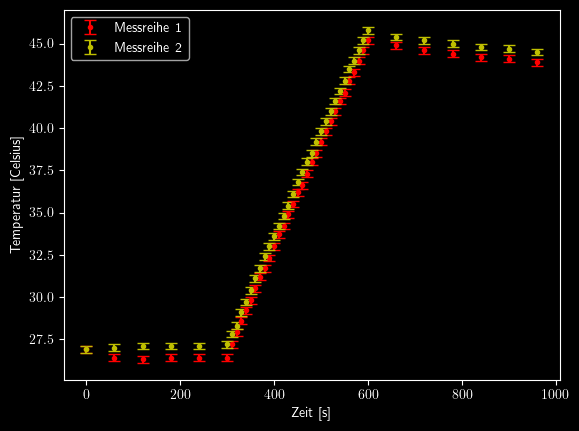

In [12]:
plt.errorbar(Time,M1,yerr=Temp_err,fmt='.',color='r',capsize=4,label='Messreihe 1')
plt.errorbar(Time,M2,yerr=Temp_err,fmt='.',color='y',capsize=4,label='Messreihe 2')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [Celsius]')
plt.legend()
plt.show()

# Regression

Regressionsgeraden:
$$ f_{V,H,N}(t)=a_{V,H,N}\cdot t+ b_{V,H,N}$$

In [13]:
def f(t,a,b):
    k=a*t+b
    return k

def fd(t,a,b):
    fd=1/(1+np.exp(-(a*t+b)))
    return fd

## Vorperiode M1

In [14]:
pop,cov=curve_fit(f,vp_t,vp_T_1)
a_vp,b_vp=pop
a_vp_err,b_vp_err=np.sqrt(np.diag(cov));
print(f'Steigung: {ufloat(a_vp,a_vp_err)}\n\n')
print(f'Achsenabschnitt: {ufloat(b_vp,b_vp_err)}\n\n');a_vp_err=ufloat(a_vp,a_vp_err);b_vp_err=ufloat(b_vp,b_vp_err);
print(f'Steigung: {a_vp_err}\n\n')
print(f'Achsenabschnitt: {b_vp_err}\n\n')
sp.stats.chisquare(vp_T_1)[0]/(len(vp_T_1)-2)

Steigung: -0.0011+/-0.0008


Achsenabschnitt: 26.64+/-0.14


Steigung: -0.0011+/-0.0008


Achsenabschnitt: 26.64+/-0.14




np.float64(0.0022040302267002446)

## Hauptperiode M1

In [15]:
pop,cov=curve_fit(f,hp_t,hp_T_1)
a_hp,b_hp=pop
a_hp_err,b_hp_err=np.sqrt(np.diag(cov))
print(f'Steigung: {ufloat(a_hp,a_hp_err)}')
print(f'Achsenabschnitt: {ufloat(b_hp,b_hp_err)}');a_hp_err=ufloat(a_hp,a_hp_err);b_hp_err=ufloat(b_hp,b_hp_err);
sp.stats.chisquare(hp_T_1)[0]/(len(hp_T_1)-2)

Steigung: 0.06192+/-0.00022
Achsenabschnitt: 8.16+/-0.10


np.float64(0.9105152805526134)

## Nachperiode M1

In [16]:
pop,cov=curve_fit(f,np_t,np_T_1)
a_np,b_np=pop
a_np_err,b_np_err=np.sqrt(np.diag(cov))
print(f'Steigung: {ufloat(a_np,a_np_err)}')
print(f'Achsenabschnitt: {ufloat(b_np,b_np_err)}');a_np_err=ufloat(a_np,a_np_err);b_np_err=ufloat(b_np,b_np_err);
sp.stats.chisquare(np_T_1)[0]/(len(np_T_1)-2)

Steigung: -0.00319+/-0.00023
Achsenabschnitt: 46.93+/-0.19


np.float64(0.0036922209695603083)

## Versuch

In [17]:
pop,cov=curve_fit(f,M1,Time)
a_M1,b_M1=pop
da_M1,db_M1=np.sqrt(np.diag(cov))
print(f'Anstieg: {ufloat(a_M1,da_M1)}')

Anstieg: 26.8+/-2.2


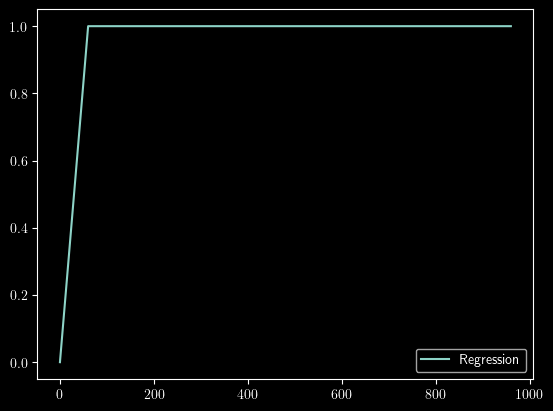

In [18]:
#plt.plot(Time,M1,'k.',label='Daten')
plt.plot(Time,fd(Time,a_M1,b_M1),label='Regression')
#plt.plot(Time,f(Time,a_M1,b_M1),label='Regression')
plt.legend()
plt.show()

## Schnittpunktberechnungen für die Punkte B und E aus dem Skirpt
## Berechnung von Delta T

In [19]:
# Schnittpunkt in Punkt B
t_B_M1_err=(b_hp_err-b_vp_err)/(a_vp_err-a_hp_err); print(f'Schnittpunkt an Punkt B: {t_B_M1_err}\n\n')

# Schnittpunkt in Punkt E
t_E_M1_err=(b_np_err-b_hp_err)/(a_hp_err-a_vp_err); print(f'Schnittpunkt an Punkt E: {t_E_M1_err}\n\n')

# Zeitpunkt t_s
t_s_M1_err=(t_B_M1_err*(a_hp_err-a_vp_err)**0.5+t_E_M1_err* (a_hp_err-a_np_err)**0.5)/( (a_hp_err-a_vp_err)**0.5+ (a_hp_err-a_np_err)**0.5)
print(f'Zeitpunkt t_s: {t_s_M1_err}\n\n')

# Zeitdifferenz delta_T
delta_T_M1_t_s_err=Del_T(t_s_M1_err,a_np_err,b_np_err,a_vp_err,b_vp_err)    # delta T, M1: Messreihe 1 für Zeitpunkt: t_s
print(f'Temperaturdifferenz: {delta_T_M1_t_s_err}')

Schnittpunkt an Punkt B: 293+/-5


Schnittpunkt an Punkt E: 615+/-9


Zeitpunkt t_s: 455+/-7


Temperaturdifferenz: 19.4+/-0.4


 ## Vorperiode M2

In [20]:
pop,cov=curve_fit(f,vp_t,vp_T_2)
a_vp_2,b_vp_2=pop
a_vp_2_err,b_vp_2_err=np.sqrt(np.diag(cov))
print(f'Steigung: {ufloat(a_vp_2,a_vp_2_err)}')
print(f'Achsenabschnitt: {ufloat(b_vp_2,b_vp_2_err)}');a_vp_2_err=ufloat(a_vp_2,a_vp_2_err);b_vp_2_err=ufloat(b_vp_2,b_vp_2_err);
sp.stats.chisquare(vp_T_2)[0]/(len(vp_t)-2)

Steigung: 0.00086+/-0.00017
Achsenabschnitt: 26.938+/-0.030


np.float64(0.000492610837438429)

## Hauptperiode M2

In [21]:
pop,cov=curve_fit(f,hp_t,hp_T_2)
a_hp_2,b_hp_2=pop
a_hp_2_err,b_hp_2_err=np.sqrt(np.diag(cov))
print(f'Steigung: {ufloat(a_hp_2,a_hp_2_err)}')
print(f'Achsenabschnitt: {ufloat(b_hp_2,b_hp_2_err)}');a_hp_2_err=ufloat(a_hp_2,a_hp_2_err);b_hp_2_err=ufloat(b_hp_2,b_hp_2_err);
sp.stats.chisquare(hp_T_2)[0]/(len(hp_t)-2)

Steigung: 0.06215+/-0.00020
Achsenabschnitt: 8.66+/-0.09


np.float64(0.9020952010785731)

## Nachperiode M2

In [22]:
pop,cov=curve_fit(f,np_t,np_T_2)
a_np_2,b_np_2=pop
a_np_2_err,b_np_2_err=np.sqrt(np.diag(cov))
print(f'Steigung: {ufloat(a_np_2,a_np_2_err)}')
print(f'Achsenabschnitt: {ufloat(b_np_2,b_np_2_err)}');a_np_2_err=ufloat(a_np_2,a_np_2_err);b_np_2_err=ufloat(b_np_2,b_np_2_err);
sp.stats.chisquare(np_T_2)[0]/(len(np_t)-2)

Steigung: -0.00295+/-0.00013
Achsenabschnitt: 47.32+/-0.11


np.float64(0.003078635014836793)

In [23]:
# Mittelung
# print(a_vp_err)
# print(a_vp_2_err)
a_vp_m=(a_vp_err+a_vp_2_err)/2;print(a_vp_m)
b_vp_m=(b_vp_err+b_vp_2_err)/2;print(b_vp_m)

a_hp_m=(a_hp_err+a_hp_2_err)/2;print(a_hp_m)
b_hp_m=(b_hp_err+b_hp_2_err)/2;print(b_hp_m)

a_np_m=(a_np_err+a_np_2_err)/2;print(a_np_m)
b_np_m=(b_np_err+b_np_2_err)/2;print(b_np_m)

-0.0001+/-0.0004
26.79+/-0.07
0.06204+/-0.00015
8.41+/-0.07
-0.00307+/-0.00013
47.13+/-0.11


## Schnittpunktberechnungen für die Punkte B und E aus dem Skirpt
## Berechnung von Delta T

In [24]:
# Schnittpunkt in Punkt B
t_B_M2_err=(b_hp_2_err-b_vp_2_err)/(a_vp_2_err-a_hp_2_err); print(f'Schnittpunkt an Punkt B: {t_B_M2_err}\n\n')

# Schnittpunkt in Punkt E
t_E_M2_err=(b_np_2_err-b_hp_2_err)/(a_hp_2_err-a_vp_2_err); print(f'Schnittpunkt an Punkt E: {t_E_M2_err}\n\n')

# Zeitpunkt t_s
t_s_M2_err=(t_B_M2_err*(a_hp_2_err-a_vp_2_err)**0.5+t_E_M2_err* (a_hp_2_err-a_np_2_err)**0.5)/( (a_hp_2_err-a_vp_2_err)**0.5+ (a_hp_2_err-a_np_2_err)**0.5)
print(f'Zeitpunkt t_s: {t_s_M2_err}\n\n')

# Zeitdifferenz delta_T
delta_T_M2_t_s_err=Del_T(t_s_M2_err,a_np_err,b_np_err,a_vp_err,b_vp_err)    # delta T, M1: Messreihe 2 für Zeitpunkt: t_s
print(f'Temperaturdifferenz: {delta_T_M2_t_s_err} Fehler in Prozent: {round(0.4/19.3*100,2)}%')

Schnittpunkt an Punkt B: 298.1+/-2.1


Schnittpunkt an Punkt E: 631+/-4


Zeitpunkt t_s: 466.9+/-2.7


Temperaturdifferenz: 19.3+/-0.4 Fehler in Prozent: 2.07%


Wenn wir uns die reduzierten $\chi^2$te der Vor- und Nachperioden anschauen, können wir daraus schließen, dass unsere Fits mit den Messdaten nicht gut übereinstimmt. Dies könnte auf die, im Vergleich zur jeweiligen Hauptperiode, geringen Anzahl der Messpunkte liegen.

# Plot mit Regressionsgeraden

In [25]:
print(t_s_M1_err)
t_s_M1=455

a=f(t_s_M1,a_vp,b_vp)
b= f(t_s_M1,a_np,b_np);print(b)

time_t_s=t_s_M1*np.ones(200)
del_T=np.linspace(a,b,200)

t=450*np.ones(200)
dT=np.linspace(f(450,a_vp,b_vp),f(450,a_np,b_np),200)

tt=np.linspace(448,462,30)
del_T_tt_oben=f(tt,a_np,b_np)
del_T_tt_unten=f(tt,a_vp,b_vp)

455+/-7
45.48261904761907


<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\benjf\AppData\Local\Temp\ipykernel_35696\1993891854.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(t,dT,color='cyan',label='$\Delta T$, grafische Abschätzung')


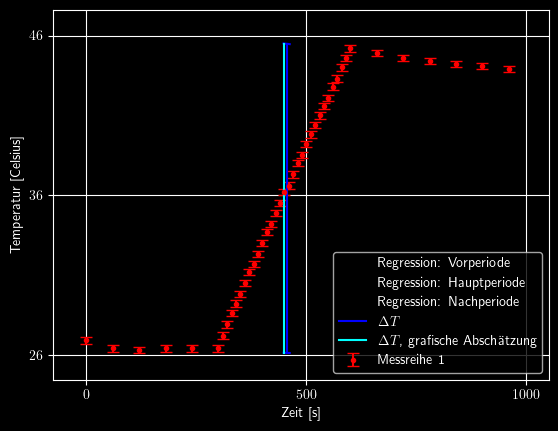

In [26]:
t_n=np.linspace(400,1000,10000)
t_h=np.linspace(280,620,1000)
t_v=np.linspace(-25,500,10000)
plt.errorbar(Time,M1,yerr=Temp_err,fmt='.',color='r',capsize=4,label='Messreihe 1',zorder=2)
plt.plot(t_v,f(t_v,a_vp,b_vp),'k--',label='Regression: Vorperiode',zorder=1)
plt.plot(t_h,f(t_h,a_hp,b_hp),'k',label='Regression: Hauptperiode',zorder=1)
plt.plot(t_n,f(t_n,a_np,b_np),'k-.',label='Regression: Nachperiode',zorder=1)
plt.plot(time_t_s,del_T,'b',label=r'$\Delta T$',zorder=2)
plt.plot(tt,del_T_tt_oben,'b',zorder=2)
plt.plot(tt,del_T_tt_unten,'b',zorder=2)
plt.plot(t,dT,color='cyan',label='$\Delta T$, grafische Abschätzung')
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [Celsius]')
plt.xticks(np.arange(0,1001,step=500))
plt.yticks(np.arange(26,50,step=10))
plt.grid()
plt.legend()
# plt.savefig('M1_T1.png',dpi=600)
plt.show()

In [27]:
print(t_s_M2_err)
t_s_M2=466.9

a_2=f(t_s_M2,a_vp_2,b_vp_2)
b_2= f(t_s_M2,a_np_2,b_np_2);print(b)

time_t_s_2=t_s_M2*np.ones(200)
del_T_2=np.linspace(a_2,b_2,200)

t_2=450*np.ones(200)
dT_2=np.linspace(f(450,a_vp_2,b_vp_2),f(450,a_np_2,b_np_2),200)

tt_2=np.linspace(448,462,30)
del_T_tt_oben_2=f(tt,a_np_2,b_np_2)
del_T_tt_unten_2=f(tt,a_vp_2,b_vp_2)

466.9+/-2.7
45.48261904761907


<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
C:\Users\benjf\AppData\Local\Temp\ipykernel_35696\1235720395.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(t_2,dT_2,color='yellow',label='$\Delta T$, grafische Abschätzung')


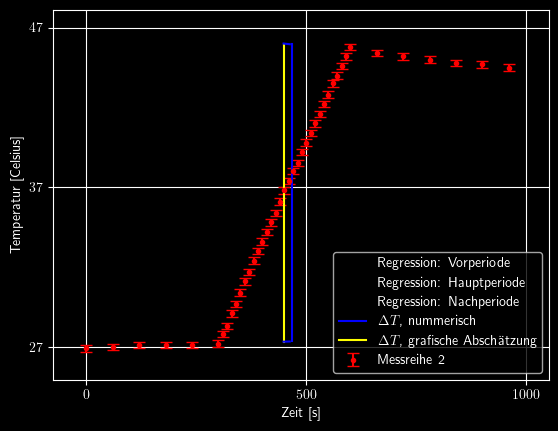

In [28]:
plt.errorbar(Time,M2,yerr=Temp_err,fmt='.',color='r',capsize=4,label='Messreihe 2',zorder=2) #
plt.plot(t_v,f(t_v,a_vp_2,b_vp_2),'k--',label='Regression: Vorperiode',zorder=1)#
plt.plot(t_h,f(t_h,a_hp,b_hp_2),'k',label='Regression: Hauptperiode',zorder=1)#
plt.plot(t_n,f(t_n,a_np_2,b_np_2),'k-.',label='Regression: Nachperiode',zorder=1)#
plt.plot(time_t_s_2,del_T_2,'b',label=r'$\Delta T$, nummerisch',zorder=2)#
plt.plot(t_2,dT_2,color='yellow',label='$\Delta T$, grafische Abschätzung')
plt.plot(tt_2,del_T_tt_oben_2,'b',zorder=2)#
plt.plot(tt_2,del_T_tt_unten_2,'b',zorder=2)#
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [Celsius]')
plt.xticks(np.arange(0,1001,step=500))
plt.yticks(np.arange(27,50,step=10))
plt.grid()
plt.legend()
# plt.savefig('M2_T1.png',dpi=600)
plt.show()

# Berechnung von $ C_k$ nach elektrischre Methode

## Berechnung von $\Delta t$

In [29]:
u1=round(np.sqrt((0.01+5e-4*hp_t[0])**2+1),1)
u2=round(np.sqrt((0.01+5e-4*hp_t[30])**2+1),1)

In [30]:
delta_t_err=ufloat(hp_t[30],u2)-ufloat(hp_t[0],u1)
print(f'delta zeit: {delta_t_err}')

delta zeit: 300.0+/-1.4


# Spannung und Strom

In [31]:
U_1_err=ufloat(24.75,0.325)  # Spannung in Volt
U_2_err=ufloat(25.00,0.325)

V_err=ufloat(3.0,0.05)       # Strom in Ampere

## Eigentliche Berechnung von $C_k$

In [32]:
# spefische Wärmekapazität von Wasser
spez_Wk=4.1813e3

# Masse
m1_M1_err=ufloat(0.246,0.002 )         #kg, weil nach Quelle: 1ml <=> 1g
m2_M1_err= ufloat(0.242,0.002 )

### erste Messreihe

In [33]:
C_k_M1=elekt_Meth_C_k(delta_t_err,U_1_err,V_err,delta_T_M1_t_s_err,m1_M1_err,spez_Wk)
print(f'Wärmekapazität Kalorimeter: {C_k_M1},\nin Prozent: {round(0.4/1.2*100,2)}%\n\n')
print(f'Zeitdifferenz: {delta_t_err} in Prozent {round(1.4/300*100,2)}%\n\n')
print(f'Spannung: {U_1_err} in Prozent: {round(0.33/24.75*100,2)}%\n\n')
print(f'Strom: {V_err} in Prozent: {0.05/3*100}% \n\n')
print(f'Masse: {m1_M1_err} in Prozent: {round(0.002/0.246*100,2)}% \n\n')
print(f'Temperaturdifferenz: {delta_T_M2_t_s_err} in Prozent: {round(0.4/19.4*100,2)}% \n\n')
print('Der dominante Fehler ist Zeitdifferenzfehler von 1.4s.')

Wärmekapazität Kalorimeter: (1.2+/-0.4)e+02,
in Prozent: 33.33%


Zeitdifferenz: 300.0+/-1.4 in Prozent 0.47%


Spannung: 24.75+/-0.33 in Prozent: 1.33%


Strom: 3.00+/-0.05 in Prozent: 1.6666666666666667% 


Masse: 0.2460+/-0.0020 in Prozent: 0.81% 


Temperaturdifferenz: 19.3+/-0.4 in Prozent: 2.06% 


Der dominante Fehler ist Zeitdifferenzfehler von 1.4s.


Die obere Rechnung habe ich per Hand ohne Fehlerrechnung nachgerechnet und sie ist richtig.

### zweite Messreihe

In [34]:
C_k_M2=elekt_Meth_C_k(delta_t_err,U_2_err,V_err,delta_T_M2_t_s_err,m2_M1_err,spez_Wk)
print(f'Wärmekapazität Kalorimeter: {C_k_M2};\nin Prozent: {round(0.4/1.5*100,2)}%')
print(f'Temperaturdifferenz: {delta_T_M2_t_s_err}')

Wärmekapazität Kalorimeter: (1.5+/-0.4)e+02;
in Prozent: 26.67%
Temperaturdifferenz: 19.3+/-0.4


## Mittelungen

In [35]:
# ts
mean_ts=np.array([t_s_M2_err,t_s_M1_err]).mean()
print(f'ts: {mean_ts}')
mean_tE=np.array([t_E_M2_err,t_E_M1_err]).mean()
print(f'te: {mean_tE}')
mean_tB=np.array([t_B_M2_err,t_B_M1_err]).mean()
print(f'tb: {mean_tB}')

ts: 461+/-4
te: 623+/-5
tb: 295.6+/-2.5


In [36]:
# Mittelung von Temp.diff:
mean_delta_T=np.array([delta_T_M2_t_s_err,delta_T_M2_t_s_err]).mean()
mean_delta_T

19.340069605938044+/-0.44569544491680674

In [37]:
mean_Ck=np.array([C_k_M2, C_k_M1]).mean()
print(f'{mean_Ck}')

(1.4+/-0.4)e+02


Die zweite 

## Mittelung der elektrischen Methode

In [38]:
C_el=np.array([C_k_M1,C_k_M2])
C_el=C_el.mean()
print(f'gemittelte Wärmekapazität: {C_el} Fehler in Prozent: {round(0.4/1.4*100,2)}%')

gemittelte Wärmekapazität: (1.4+/-0.4)e+02 Fehler in Prozent: 28.57%


# Mischungsmethode

Richmann'sche Mischungsregel:
$$(m_1 c_w+C_k)(T_m-T_1)=m_2 c_w (T_2-T_m)\\ C_k=m_2 c_w \frac{(T_2-T_m)}{(T_m-T_1)}-m_1 c_w$$

## Definitionen

In [39]:
def C_k_Meth_2(T1,T2,TM,m1,m2,cw):
    C=m2*cw*(T2-TM)/(TM-T1)-m1*cw
    return C

# Daten laden

In [42]:
data=pd.read_csv('zweiter_teilverwuch.txt',sep='\t')
print(data)
T1=data['T1'].values
#print(T1)
T2=data['T2'].values
#print(T2)
TM=data['TM'].values
#print(TM)
m1=data['m1'].values
m2=data['m2'].values

     T1    T2    TM     m1     m2
0  26.0  38.1  31.7  0.148  0.155
1  26.8  42.5  33.6  0.148  0.148
2  27.2  39.6  32.5  0.150  0.142


## Daten mit jeweiligen Fehlern

In [43]:
T1_err=np.array([ufloat(273.15+26.0,0.2),ufloat(273.15+26.8,0.2),ufloat(273.15+27.2,0.2)])   # in Kelvin
T2_err=np.array([ufloat(273.15+38.1,0.2),ufloat(273.15+42.5,0.2),ufloat(273.15+39.6,0.2)])
TM_err=np.array([ufloat(273.15+31.7,0.2),ufloat(273.15+33.6,0.2),ufloat(273.15+32.5,0.2)])
m1_err=np.array([ufloat(0.148,0.002),ufloat(0.148,0.002),ufloat(0.150,0.002)])
m2_err=np.array([ufloat(0.155,0.002),ufloat(0.148,0.002),ufloat(0.142,0.002)])
print(f'Mittelwerte: \n T1 {T1_err.mean()}\n T2 {T2_err.mean()}\n TM: {TM_err.mean()} \n m1: {m1_err.mean()} \n m2: {m2_err.mean()}\n\n  ')
print(f'''Fehler in Prozent bei Temperatur:
{0.2/T1*100}\n
{0.2/T2*100}\n
{0.2/TM*100}\n\n''')
print(f'''Fehler in Prozent bei Masse:
{0.002/m1*100}\n
{0.002/m2*100}\n\n''')
print('Dominanter Fehler ist der Fehler von der Temperatur, weil dieser 100 mal größer ist als der von der Masse.')

Mittelwerte: 
 T1 299.82+/-0.12
 T2 313.22+/-0.12
 TM: 305.75+/-0.12 
 m1: 0.1487+/-0.0012 
 m2: 0.1483+/-0.0012

  
Fehler in Prozent bei Temperatur:
[0.76923077 0.74626866 0.73529412]

[0.52493438 0.47058824 0.50505051]

[0.63091483 0.5952381  0.61538462]


Fehler in Prozent bei Masse:
[1.35135135 1.35135135 1.33333333]

[1.29032258 1.35135135 1.4084507 ]


Dominanter Fehler ist der Fehler von der Temperatur, weil dieser 100 mal größer ist als der von der Masse.


# Berechnung von $C_k$

In [44]:
C=C_k_Meth_2(T1_err,T2_err,TM_err,m1_err,m2_err,spez_Wk)
print(C)
C=C.mean()
print(f'Wärmekapazität des Kalorimeters: {C}, Fehler in Prozent: {round(35/156*100,)}%')

[108.8605122807071+/-60.47719755898191
 191.11000588234947+/-53.426576272312
 168.19870943396302+/-65.9258644099985]
Wärmekapazität des Kalorimeters: 156+/-35, Fehler in Prozent: 22%


In [45]:
err=np.array([60,50,70])
print(err.mean())
print(np.sqrt(60**2+50**2+70**2)/3)

60.0
34.96029493900505
